<a href="https://colab.research.google.com/github/fahmiajik12/Python/blob/Master/dataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load Dataset

In [2]:
#Koneksi ke Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Load Data From Local File
data=pd.read_csv('telco.csv',sep=';')

Data Understanding

In [4]:
#See the first five data 
data.head()

,customerid,region,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,2424-WVHPL,France,Male,1,No,No,1,Yes,No,Fiber optic,...,No,No,Yes,No,No,No,Electronic check,12.00,12,No
1,3679-XASPY,France,Female,0,Yes,Yes,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,No,Electronic check,13.00,13,No
2,2967-MXRAV,Germany,Male,0,Yes,Yes,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,No,Mailed check,18.80,18.8,No
3,8992-CEUEN,Germany,Female,0,No,No,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,No,Electronic check,18.85,18.85,No
4,9318-NKNFC,Germany,Male,0,No,No,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,Mailed check,18.85,18.85,Yes


In [5]:
# see the number of row and number of columns of data
data.shape

(7043, 21)

In [6]:
#Understanding each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   region            7043 non-null   object 
 2   gender            7043 non-null   object 
 3   seniorcitizen     7043 non-null   int64  
 4   partner           7043 non-null   object 
 5   dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   phoneservice      7043 non-null   object 
 8   multiplelines     7043 non-null   object 
 9   internetservice   7043 non-null   object 
 10  onlinesecurity    7043 non-null   object 
 11  onlinebackup      7043 non-null   object 
 12  deviceprotection  7043 non-null   object 
 13  techsupport       7043 non-null   object 
 14  streamingtv       7043 non-null   object 
 15  streamingmovies   7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [7]:
#see a statistical summary of variables with numeric types
data.describe()

,seniorcitizen,tenure,monthlycharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.401107,64.751874
std,0.368612,24.606849,30.097858
min,0.000000,1.000000,12.000000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,120.000000,118.750000


Data Cleaning and Preprocessing

Check Dulpicate Data

In [8]:
#Drop duplicate value
data=data.drop_duplicates()

In [9]:
#see changes in the number of rows and columns after the duplicate drop
data.shape

(7043, 21)

Check Data Types

In [10]:
#Check data type
data.dtypes

customerid           object
region               object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [11]:
#merubah nilai kosong dengan isi spasi menjadi NA
data["totalcharges"]=data["totalcharges"].replace(" ",np.nan)

In [12]:
#merubah tipe data
data["totalcharges"]=data["totalcharges"].astype("float64")

In [13]:
data.dtypes

customerid           object
region               object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

In [14]:
#Check the missing value
data.isnull().sum()

customerid           0
region               0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


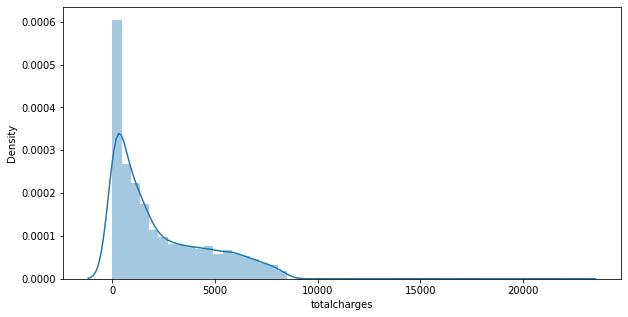

In [15]:
#Look at the distribution of the totalcharges variable with histogram and density plot
plt.figure(figsize=(10,5))
sns.distplot(data["totalcharges"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


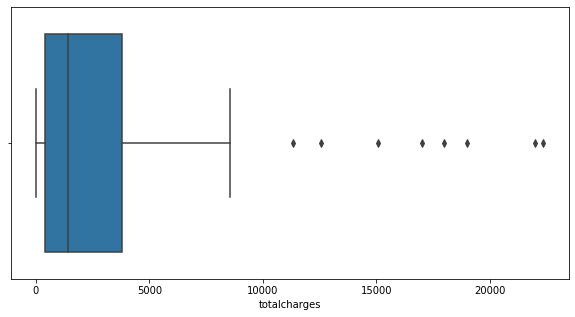

In [16]:
#Look at the distribution of the totalcharges variable with boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data["totalcharges"])
plt.show()

In [17]:
#See observation outliers on the totalcharges variable
Q1=data["totalcharges"].quantile(0.25)
Q3=data["totalcharges"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
data.loc[ (data["totalcharges"]>upper_range),:]

,customerid,region,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
7024,2889-FPWRM,Germany,Male,0,Yes,No,96,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Yes,Bank transfer (automatic),117.80,11308.8,Yes
7025,7892-POOKP,France,Female,0,Yes,No,120,Yes,Yes,Fiber optic,...,No,Yes,Yes,Yes,Yes,Yes,Electronic check,104.80,12576.0,Yes
7026,7569-NMZYQ,Germany,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Yes,Bank transfer (automatic),118.75,15087.9,No
7027,9739-JLPQJ,Germany,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,No,Credit card (automatic),117.50,16987.9,No
7028,9924-JPRMC,Germany,Male,0,No,No,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Yes,Electronic check,118.20,17987.3,No
7029,8879-XUAHX,Germany,Male,0,Yes,No,71,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Yes,Electronic check,116.25,18987.9,No
7030,9788-HNGUT,Germany,Male,0,Yes,No,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Yes,Credit card (automatic),116.95,21987.5,No
7031,6007-TCTST,Germany,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Yes,Bank transfer (automatic),115.80,22345.6,No


In [18]:
#Replace outlier observations with upper bound and lower bound
data.loc[(data["totalcharges"]>upper_range),"totalcharges"]=upper_range

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


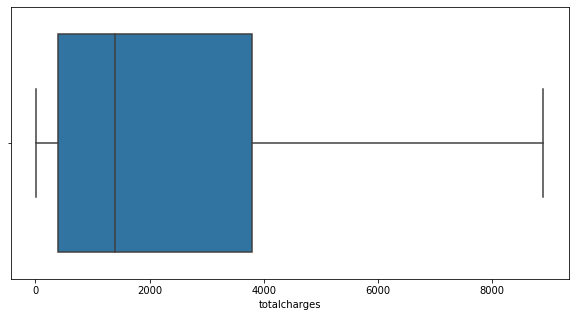

In [19]:
#Check outlier on the totalcharges variable
plt.figure(figsize=(10,5))
sns.boxplot(data["totalcharges"])
plt.show()

Handle Inconsistent Data

In [20]:
replace_cols1 = ['onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
                 'streamingtv', 'streamingmovies']
for i in replace_cols1 :
  data[i] = data[i].replace({'No internet service' : 'No'})

  data['multiplelines'] = data['multiplelines'].replace({'No phone service' : 'No'})

Encoding Variables

In [21]:
from sklearn.preprocessing import LabelEncoder

Id_col = ['customerid']
num_cols = ['tenure', 'monthlycharge', 'totalcharges']

bin_cols = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'onlinesecurity',
            'churn', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling']

multi_cols = ['region', 'internetservice', 'paymentmethod']

le = LabelEncoder()
for i in bin_cols :
  data[i] = le.fit_transform(data[i])

data=pd.get_dummies(data=data,columns = multi_cols,drop_first=True)

In [22]:
data

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,...,monthlycharges,totalcharges,churn,region_France,region_Germany,internetservice_Fiber optic,internetservice_No,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,2424-WVHPL,1,1,0,0,1,1,0,0,0,...,12.00,12.00,0,1,0,1,0,0,1,0
1,3679-XASPY,0,0,1,1,1,1,0,0,0,...,13.00,13.00,0,1,0,0,1,0,1,0
2,2967-MXRAV,1,0,1,1,1,1,0,0,0,...,18.80,18.80,0,0,1,0,1,0,0,1
3,8992-CEUEN,0,0,0,0,1,1,0,0,0,...,18.85,18.85,0,0,1,0,1,0,1,0
4,9318-NKNFC,1,0,0,0,1,1,0,0,0,...,18.85,18.85,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4472-LVYGI,0,0,1,1,2,0,0,1,0,...,52.55,NaN,0,0,1,0,0,0,0,0
7039,1371-DWPAZ,0,0,1,1,2,0,0,1,1,...,56.05,NaN,0,0,1,0,0,1,0,0
7040,2775-SEFEE,1,0,0,1,3,1,1,1,1,...,61.90,NaN,0,0,1,0,0,0,0,0
7041,4075-WKNIU,0,0,1,1,3,1,1,0,1,...,73.35,NaN,0,0,1,0,0,0,0,1


Data Partition

In [23]:
data=data.drop(labels='customerid',axis=1)

In [24]:
from sklearn.model_selection import train_test_split

#partition data into data training and data testing
train,test = train_test_split(data,test_size = 0.2, random_state = 111)

#separating depend and independent variables on training and testing data
train_X = train.drop(labels='churn',axis=1)
train_Y = train['churn']
test_X  = test.drop(labels='churn',axis=1)
test_Y  = test['churn']

SMOTE(Synthetic Minority Oversampling Technique)

In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
#def clean_dataset(df):
 #   assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
 #  df.dropna(inplace=True)
 #   indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
 #  return df[indices_to_keep].astype(np.float64)

In [27]:
from imblearn.over_sampling import SMOTE

#handling imbalance class using oversampling minority class with SMOTE method
os = SMOTE(sampling_strategy='minority',random_state = 123,k_neighbors=5)
train_smote_X,train_smote_Y = os.fit_resample(train_X,train_Y)
train_smote_X = pd.DataFrame(data = train_smote_X,columns=train_X.columns)
train_smote_Y = pd.DataFrame(data = train_smote_Y)

ValueError: ignored

In [ ]:
#Propotion before smote
train_Y.value_counts()

In [ ]:
#Prppotion after smote
train_smote